# Coded Data Viz and Exploration
This Jupyter notebook is mainly to look at my data now that it has been qualitatively coded!
This is a new, continuing script.

## Qualitative Coding
Unlike coding with something like Python, qualitative coding here is basically just giving an item a discrete value based on some property. In this project, I am looking at how people use algopseak, so my the codes listed in the mention_code column of my CSV/dataframe are split up into four categories of use. 
| Code      | Meaning                                                                                                               |
|-----------|-----------------------------------------------------------------------------------------------------------------------|
| a         | algospeak - The term is being used to censor another term                                                             |
| m         | mention - The term is being mentioned as an algospeak term but not used to censor anything. Can also stand for "meta" |
| n         | not algospeak - The term is not being used as an algospeak term                                                       |
| o         | other - Term is not present or something else                                                                         |

## Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pprint
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Pretty printing has been turned OFF


In [2]:
algo_df = pd.read_csv('algospeak_top_posts.csv')
algo_df.sample(5)

,text,author,display_name,date,likes,quotes,replies,reposts,uri,query,mention_code
72,Grape Cake 🍇 \npainted in #procreate\n#ProcreateArtist,artneverath.bsky.social,Florian Benedikt,2025-02-23T01:42:40.830Z,45,0,0,5,at://did:plc:d2dfxxcldpk3vqvvyw3izwso/app.bsky.feed.post/3lispfhoffk2f,grape,n
42,"He's also their biggest cockblocker though lmaoo\n\nCan't blame him, if I were a Gundam I also wouldn't let two horny teenagers do the seggs in my cockpit lol",grenaja.bsky.social,Grenaja,2025-02-23T21:11:46.711Z,9,0,3,1,at://did:plc:koblqnig7cn2mmcf3huljdyy/app.bsky.feed.post/3liuqq2klis2l,seggs,a
106,"congrats on the milestone juuni!!\n\nI'm evan! Just a self-taught hobbyist, and I mainly draw OCs! Recently (like in the last month) I have gotten absolutely obsessed with Dragon Age Inquisition 🙈",evans-endeavors.bsky.social,🏳️‍🌈 evan ✨,2025-02-18T17:52:40.396Z,91,0,4,17,at://did:plc:str4dgm7viuchfwpi72hkjna/app.bsky.feed.post/3lihtbdto522e,palm colored,o
135,"It is slightly less chaotic this morning, but that's because the ducklings have had half an overripe watermelon to enjoy. (See the pink on their breast?)",veronicaf.bsky.social,Veronica,2025-02-21T22:12:56.292Z,108,1,13,9,at://did:plc:dnasdrejui4cejydosm7beyg/app.bsky.feed.post/3lipt7io4gs2s,watermelon,n
113,"This was the first piece from Summer in the Cult. I wanted to do some cross between pin up, modern aesthetic of cthulhu mythos, Blue Oyster Cult songs and a Corona Sunset kind of vibe",coplantor.bsky.social,Juan Diego Pucurull,2025-02-15T19:37:45.059Z,3,0,1,0,at://did:plc:iyw6xtlvxogt33tbfbd7ydyr/app.bsky.feed.post/3liahqhyzp22y,palm colored,o


In [3]:
# Here you can see the mention codes with context
algo_df[['text','query', 'mention_code']].sample(5)

,text,query,mention_code
88,Last night was the best sleep I’ve had in weeks. Heavy deadlifts do that to me ✨,grape,o
70,I honestly don’t think these people understand that videogames are designed to be beaten. Like a team of people worked together to make it satisfying but not frustrating to beat Assassins Creed Syndicate. Overcoming the odds would be if Hideo Kojima sent you a grape and said “end nuclear war”,grape,n
106,"congrats on the milestone juuni!!\n\nI'm evan! Just a self-taught hobbyist, and I mainly draw OCs! Recently (like in the last month) I have gotten absolutely obsessed with Dragon Age Inquisition 🙈",palm colored,o
45,DEMONESS SEGGS,seggs,a
7,I *AM* on vacation and people still wanna unalive me at work.,unalive,a


In [4]:
algo_df.mention_code.value_counts()

mention_code
a    49
n    48
o    41
m    10
Name: count, dtype: int64

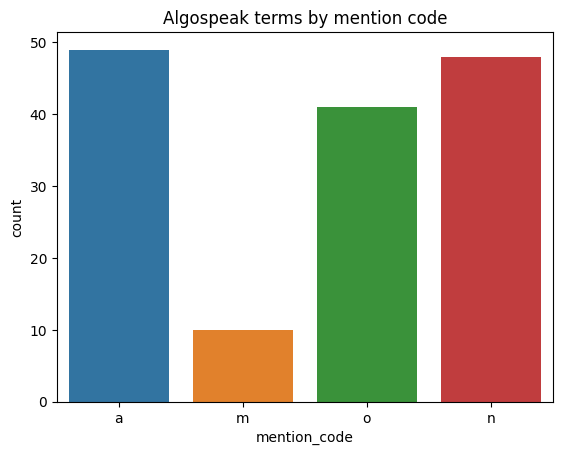

In [14]:
plot = sns.countplot(x = 'mention_code', hue='mention_code', data = algo_df).set_title('Algospeak terms by mention code')
plt.savefig('plots/terms_by_code.png')

You can see here that there wasn't a ton of metadiscourse about algopseak in this sample, but there is a lot of stuff that isn't algospeak here

In [6]:
code_by_term = algo_df.groupby('query').mention_code.value_counts().unstack()
code_by_term

mention_code,a,m,n,o
query,,,,
grape,NaN,NaN,27.0,3.0
palm colored,2.0,1.0,NaN,27.0
seggs,26.0,1.0,NaN,3.0
unalive,21.0,8.0,NaN,NaN
watermelon,NaN,NaN,21.0,8.0


In [7]:
code_by_term = code_by_term.fillna(0)
code_by_term

mention_code,a,m,n,o
query,,,,
grape,0.0,0.0,27.0,3.0
palm colored,2.0,1.0,0.0,27.0
seggs,26.0,1.0,0.0,3.0
unalive,21.0,8.0,0.0,0.0
watermelon,0.0,0.0,21.0,8.0


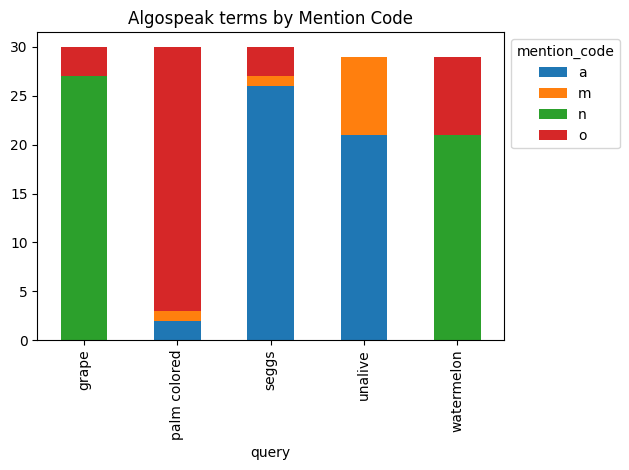

In [15]:
ax = code_by_term.plot(kind='bar', stacked=True)
ax.set_title('Algospeak terms by Mention Code')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('plots/terms_by_code_stacked.png')

There's a big difference between the terms! There are no algospeak uses for grape or watermelon here, and only a couple for palm-colored. Unalive is really the only term that is unambiguously algospeak in this small dataset.

## Looking at the "unalive" dataset
Coded the same way but it's just unalive now

In [9]:
unalive_df = pd.read_csv('unalive_top_posts.csv')
unalive_df.sample(10)

,text,author,display_name,date,likes,quotes,replies,reposts,uri,url,reply_to,reply_to_uri,reply_to_url,query,mention_code
182,"So to avoid YouTube demonetizing videos, some content creators have to use certain terms for words. (pedophile is PDF file, suicide is unalive etc etc)\n\nReese Waters calling Nazis ""Yahtzees"" is fucking brilliant. Lol.",lif3asmaj.bsky.social,Maj,2025-03-17T21:21:21.794Z,13,0,3,2,at://did:plc:rj7sphb3g7r2bbdclow4hdut/app.bsky.feed.post/3lkm3jel5zc2d,https://bsky.app/profile/did:plc:rj7sphb3g7r2bbdclow4hdut/post/3lkm3jel5zc2d,No,NaN,NaN,unalive,m
78,"Same situation with the ""unalive"" shit. Why can't we just say kill, murder, or suicide like normal people?",longtallandugly.bsky.social,Anime guy from Malcolm in the Middle,2025-04-08T05:27:29.453Z,7,0,1,0,at://did:plc:i3b3zi76cwz4wakccusb3lhz/app.bsky.feed.post/3lmbqhxpcws2f,https://bsky.app/profile/did:plc:i3b3zi76cwz4wakccusb3lhz/post/3lmbqhxpcws2f,Yes,at://did:plc:nbcsgvekpjkmyw5l6352l34j/app.bsky.feed.post/3lmbq2ct6ok2t,https://bsky.app/profile/did:plc:nbcsgvekpjkmyw5l6352l34j/post/3lmbq2ct6ok2t,unalive,m
118,I will FOREVER hate the term “unalive”. It sounds SO fucking childish!,kingblackbird.bsky.social,King Blackbird,2025-03-27T02:53:00.231Z,6,0,1,1,at://did:plc:p5g7tsttk3ujlsohg5lvflv5/app.bsky.feed.post/3lldcaoe2es2q,https://bsky.app/profile/did:plc:p5g7tsttk3ujlsohg5lvflv5/post/3lldcaoe2es2q,No,NaN,NaN,unalive,m
56,"Two days before its sixth birthday, my laptop has decided to unalive itself.\n\nRaise a glass for Bunter, third of the name, and for my poor credit card, which is absolutely fucking melting down this month, in what can only be described as _fucking horrible timing_",lauraannegilman.bsky.social,Laura Anne Gilman,2025-04-08T04:45:49.985Z,32,0,3,0,at://did:plc:hkty3tdfs3jkra7hjtlymxi3/app.bsky.feed.post/3lmbo5hzlak2s,https://bsky.app/profile/did:plc:hkty3tdfs3jkra7hjtlymxi3/post/3lmbo5hzlak2s,No,NaN,NaN,unalive,a
50,"also need yall to also see this banger quote by soren:\n\ngamers don’t say things like unalive, they say things like kill your self",hellohellothere.bsky.social,soul - semi ia bc of uni,2025-04-12T00:31:25.673Z,15,0,2,0,at://did:plc:i22kxwiszdpyy2p2mbznrmyd/app.bsky.feed.post/3lmlbsaoom22g,https://bsky.app/profile/did:plc:i22kxwiszdpyy2p2mbznrmyd/post/3lmlbsaoom22g,No,NaN,NaN,unalive,m
55,What if the reason they are trying to postpone bringing Kilmar Abrego Garcia back from El Salvador is because he is unalive? He came here in 2011 to flee violent gang members who threatened to kill him to extort his parents. I hope I'm wrong. I don't trust our own government and DOJ to be honest.,jessiedoesky.bsky.social,NaN,2025-04-08T03:39:32.239Z,33,1,2,7,at://did:plc:afxgzydnf6rpclzcglx52nzx/app.bsky.feed.post/3lmbkgwkdpk2b,https://bsky.app/profile/did:plc:afxgzydnf6rpclzcglx52nzx/post/3lmbkgwkdpk2b,No,NaN,NaN,unalive,a
128,if moving the firehose consumers to their own servers and batching writes doesn't fix the after dark feed lag issue I'm gonna unalive myself,slut.dog,Pupperlily Doggerkettle 🔞 🔜 LVFC,2025-03-25T18:20:47.371Z,12,0,1,0,at://did:plc:bfuck3vwwacatltdmnilloym/app.bsky.feed.post/3ll7v5tqssk24,https://bsky.app/profile/did:plc:bfuck3vwwacatltdmnilloym/post/3ll7v5tqssk24,No,NaN,NaN,unalive,a
7,His father would unalive this moron.,safarilady2025.bsky.social,NaN,2025-04-14T14:34:01.799Z,7,0,0,2,at://did:plc:chy4urwfir5gcgagapeu2voc/app.bsky.feed.post/3lmrrsropfk2i,https://bsky.app/profile/did:plc:chy4urwfir5gcgagapeu2voc/post/3lmrrsropfk2i,Yes,at://did:plc:vrps533rrs2nbq636qbwn2vd/app.bsky.feed.post/3lmrpkvfibs25,https://bsky.app/profile/did:plc:vrps533rrs2nbq636qbwn2vd/post/3lmrpkvfibs25,unalive,a
95,"That is so rude and callous! Seriously people, have you no decency?!\n\nI thought we were saying “unalive” these days. ;)",justmejoepdx.bsky.social,JustMeJoePdx,2025-04-03T03:52:44.059Z,50,0,2,0,at://did:plc:knebqkulkbnqtf6g4d2xyzyw/app.bsky.feed.post/3lluytwezgk24,https://bsky.app/profile/did:plc:knebqkulkbnqtf6g4d2xyzyw/post

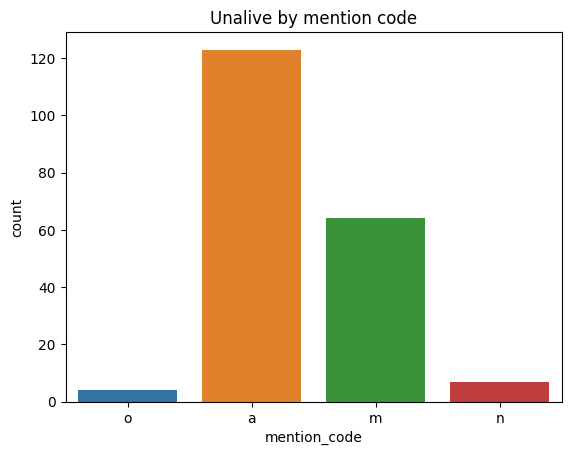

In [13]:
sns.countplot(x = 'mention_code', hue='mention_code', data = unalive_df).set_title('Unalive by mention code')
plt.savefig('plots/unalive_by_code.png')

In [11]:
likes_by_code = unalive_df.groupby('mention_code')[['likes', 'quotes', 'replies']].mean()
likes_by_code

,likes,quotes,replies
mention_code,,,
a,17.325203,0.373984,1.357724
m,41.140625,0.468750,2.218750
n,84.142857,0.857143,4.000000
o,77.750000,0.000000,0.500000


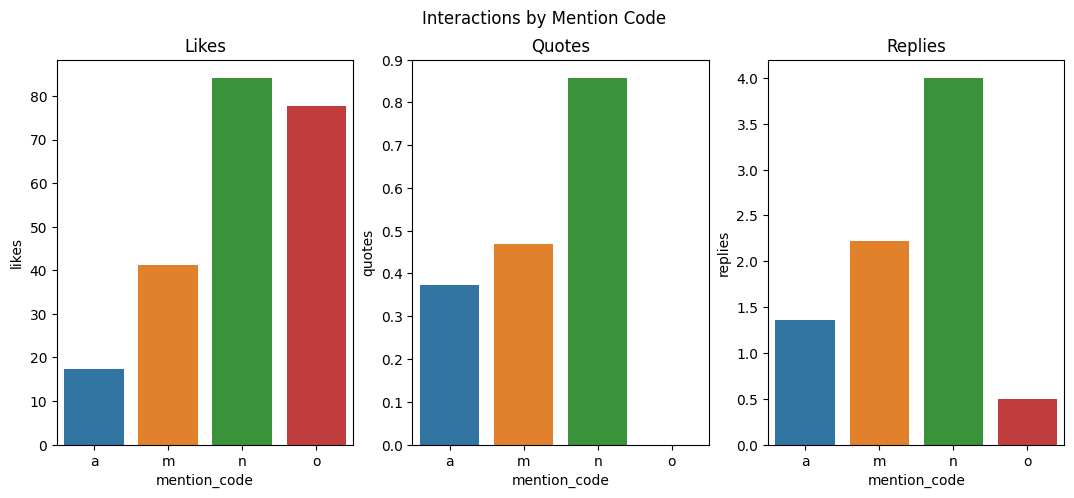

In [12]:
fig, ax = plt.subplots(1, 3, sharex = True, figsize=(13,5))
fig.suptitle('Interactions by Mention Code')
ax[0].set_title('Likes')
ax[1].set_title('Quotes')
ax[2].set_title('Replies')
sns.barplot(x = 'mention_code', y = 'likes', hue='mention_code', data=likes_by_code, ax=ax[0])
sns.barplot(x = 'mention_code', y = 'quotes', hue='mention_code', data=likes_by_code, ax=ax[1])
sns.barplot(x = 'mention_code', y = 'replies', hue='mention_code', data=likes_by_code, ax=ax[2])
plt.savefig('plots/interactions_by_mention_code.png')